<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Jose-Bernardo-Moreno-Villarreal/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Ciencia y Analítica de Datos**
####Profr: María de la Paz Rico Fdz
#### 26-Octubre-2022

#####A01794050 - Moreno Villarreal José Bernardo 



# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [3]:
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv
import pandas as pd

**Comentario** 

Para esta actividad se crea una función que nos permita visualizar una matriz original, posteriormente sus eigen valores y eigen vectores. 
Se obtiene la matriz diagonal D que se forma a partir de los eigen valores. 
A la par, se obtiene la matriz Winv que es la matriz inversa de los eigen vectores de la matriz original. 
Al final se realiza la recontrucción de la matriz original mediante la multiplicación de la matriz de eigen vectores con respecto a la matriz diagonal que contiene los eigen valores y a su vez se multiplica por la matriz inversa de los eigen vectores. Todo ello para poder calcular nuevamente la proyección de la matriz original sobre el espacio original. 

In [4]:
###-----------------EJEMPLO DE EIGENVALORES
def Matrices (A): 
  print("-------Matriz original-------")
  print(A)

  print("\n--------Eigen Vectores/Eigen valores-----------------")
  # calcula la eigendescomposición
  values, vectors = eig(A)
  print("\nValores - (Matriz D): ")
  print(values) #D
  print("\nVectores - (Matriz W): ")
  print(vectors) #W

  #Ejemplo de reconstrucción
  values, vectors = np.linalg.eig(A)

  W = vectors
  Winv = np.linalg.inv(W)
  D = np.diag(values)
  #la matriz B tiene que dar igual a A
  #reconstruye la matriz 
  print("\n-------Matriz reconstruida-------")
  # Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
  #ojo, estas multiplicando matrices, no escalares ;)
  #TU CODIGO AQUI-------------------------------------
  B=np.matmul(np.matmul(W,D),Winv) 
  print(np.round(B,2).real)

A = array([[ 1, 2, 3], [4, 5, 6], [7, 8, 9]])
Matrices(A)

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]

--------Eigen Vectores/Eigen valores-----------------

Valores - (Matriz D): 
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]

Vectores - (Matriz W): 
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]

-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [5]:
#Matriz 1
A1 = array([[ 3, 0, 2], [3, 0, -2], [0, 1, 1]])
Matrices(A1)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]

--------Eigen Vectores/Eigen valores-----------------

Valores - (Matriz D): 
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]

Vectores - (Matriz W): 
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]

-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]


In [6]:
#Matriz 2
A2 = array([[ 1, 3, 8], [2, 0, 0], [0, 0, 1]])
Matrices(A2)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]

--------Eigen Vectores/Eigen valores-----------------

Valores - (Matriz D): 
[ 3. -2.  1.]

Vectores - (Matriz W): 
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]

-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]


In [7]:
#Matriz 3
A1 = array([[ 5, 4, 0], [1, 0, 1], [10, 7, 1]])
Matrices(A1)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]

--------Eigen Vectores/Eigen valores-----------------

Valores - (Matriz D): 
[ 6.89167094 -0.214175   -0.67749594]

Vectores - (Matriz W): 
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]

-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

**Comentario** 

Para esta actividad se realiza la lectura de una imagen la cual está dada por los valores binarios de cada pixel. Dependiendo del tamaño de la imagen obtendremos un tamaño diferente de matriz que contenga la información. 
Posteriormente aplicamos el mismo procedimiento utilizado en el ejercicio 1 para reconstruir la matriz original, es decir WDWinv; la diferencia en este caso es que no se tomaran todos los datos de la matriz, si no unicamente los mínimos necesarios que nos permitan tener la cantidad de información mínima suficiente. 

In [8]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')


def comImagen (img): 
  plt.style.use('classic')
  imggray = img.convert('LA')
  imgmat = np.array(list(imggray.getdata(band=0)),float)

  print(imgmat)

  imgmat.shape = (imggray.size[1],imggray.size[0])

  plt.figure(figsize=(9,6))
  plt.imshow(imgmat,cmap='gray')
  plt.show()
  print(img)
  return imgmat

[72. 73. 74. ... 48. 47. 47.]


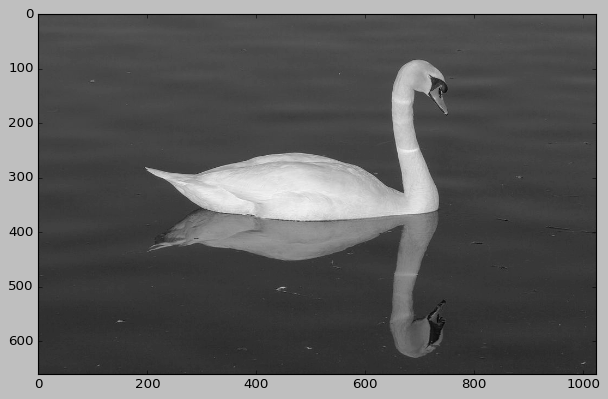

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F1B05798D10>


(660, 1024)

In [9]:
imgmat = comImagen (img)
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


Tamaño de U:  (660, 660) 
Tamaño de V:  (1024, 1024)


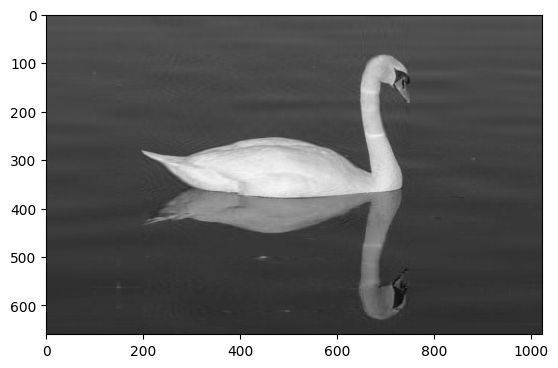

Felicidades la imagen está comprimida


In [44]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
def ReconstruirImagen (nvalue,U,D,V):
  print("Tamaño de U: ", U.shape, "\nTamaño de V: ", V.shape)
  #------------------------------
  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
  #ve las dimensiones de la imagen y su descomposicion
  #660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)
        #=U(660X50)(50X50)(50X1024)
  plt.imshow(reconstimg,cmap='gray')
  plt.show()
  print("Felicidades la imagen está comprimida")

ReconstruirImagen(50,U,D,V)

¡Ahora es tu turno!, comprime 3 imagenes

[62. 62. 62. ... 41. 41. 41.]


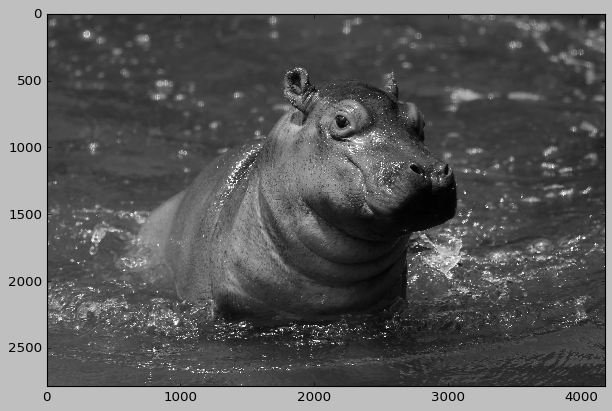

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4171x2780 at 0x7F1B023558D0>


(2780, 4171)

In [11]:
#imagen 1
img1 = Image.open('/content/Hipo.jpg')
imgmat1 = comImagen (img1)
U1,D1,V1 = np.linalg.svd(imgmat1)
imgmat1.shape

Tamaño de U:  (2780, 2780) 
Tamaño de V:  (4171, 4171)


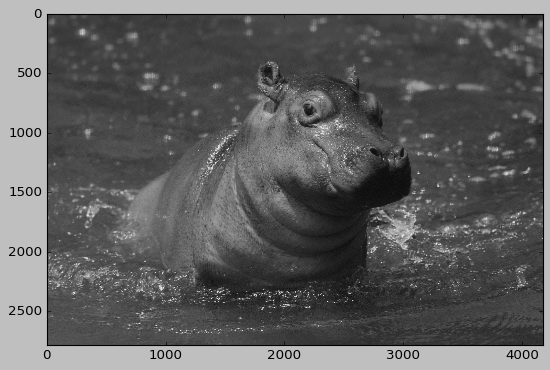

Felicidades la imagen está comprimida


In [19]:
ReconstruirImagen(250,U1,D1,V1)

[129. 131. 134. ... 105. 131. 183.]


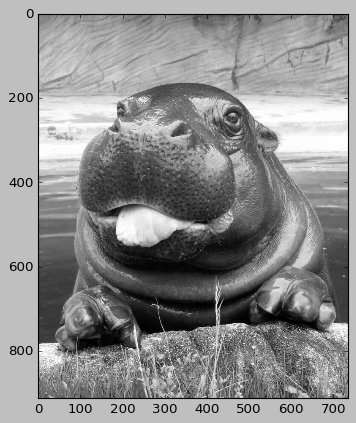

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=736x911 at 0x7F1AFFEF72D0>


(911, 736)

In [21]:
#imagen 2
img2 = Image.open('/content/Hipo2.jpg')
imgmat2 = comImagen (img2)
U2,D2,V2 = np.linalg.svd(imgmat2)
imgmat2.shape

Tamaño de U:  (911, 911) 
Tamaño de V:  (736, 736)


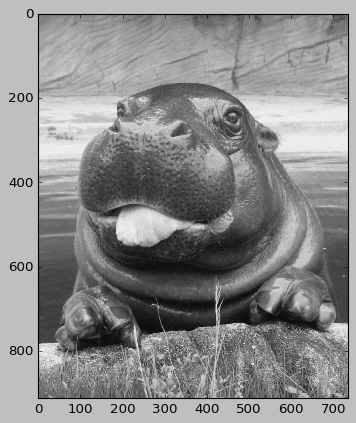

Felicidades la imagen está comprimida


In [24]:
ReconstruirImagen(200,U2,D2,V2)

[119. 113. 126. ... 147. 148. 149.]


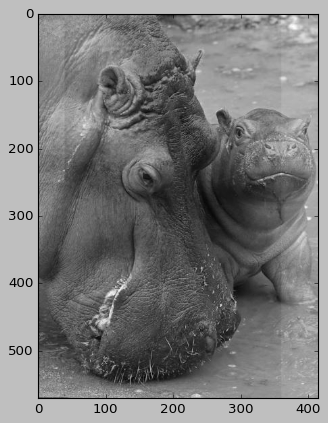

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=416x570 at 0x7F1AFFCE4950>


(570, 416)

In [28]:
#imagen 3
img3 = Image.open('/content/Hipo3.JPG')
imgmat3 = comImagen (img3)
U3,D3,V3 = np.linalg.svd(imgmat3)
imgmat3.shape

Tamaño de U:  (570, 570) 
Tamaño de V:  (416, 416)


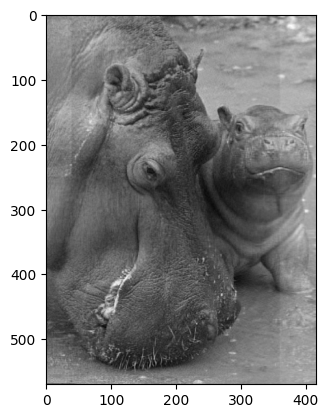

Felicidades la imagen está comprimida


In [41]:
ReconstruirImagen(110,U3,D3,V3)

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [33]:
#código aquí
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

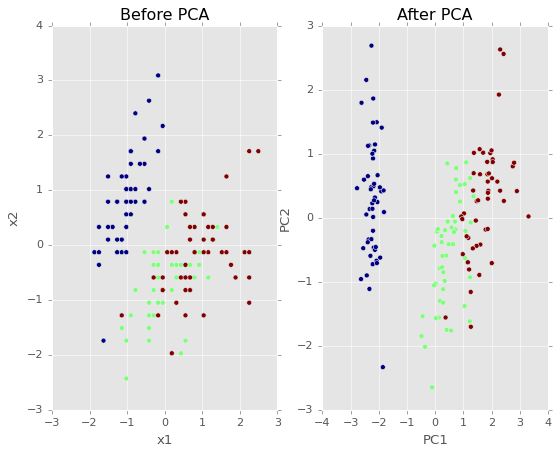

In [34]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [35]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [36]:
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [37]:
pca.explained_variance_ 
array([2.93808505, 0.9201649])

array([2.93808505, 0.9201649 ])

In [38]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

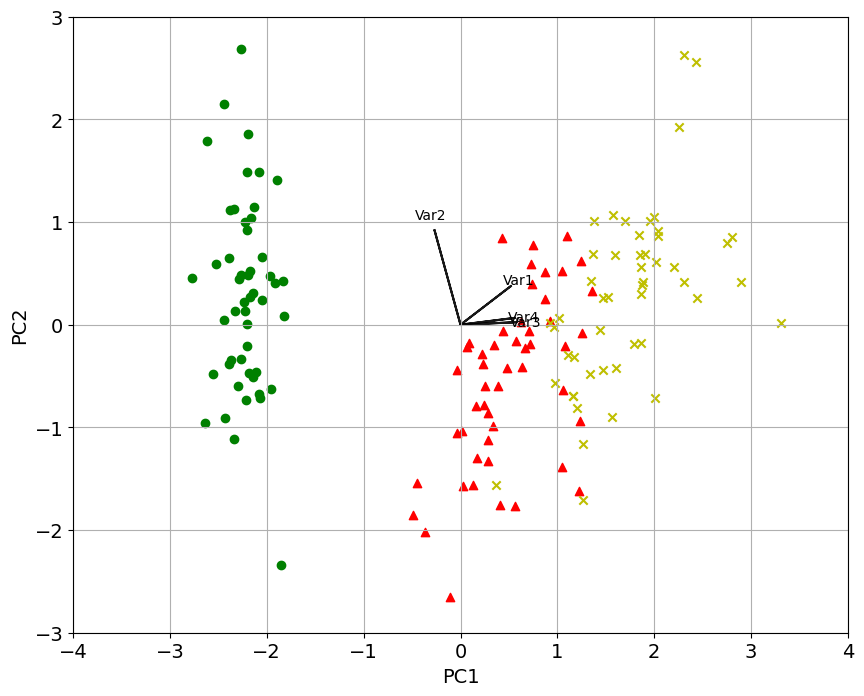

In [39]:

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [40]:


# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

#Conclusiones


**Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances**

* Se tiene una variable de entrada con datos centrados, es decir media y mediana centrados y desviación estándar =1. 
* Se obtiene la matriz de covarianza. 
* Se obtienen los eigen vectores y eigen valores de la matriz de covarianza
* Se realiza reducción de dimensiones que resultan de la proyección de nuestros datos sobre el eje W calculado a partir de la descomposicion de eigen vectores de la matriz de covarianza. 


**¿Qué es feature importance y para que nos sirve?**

* PCA nos permite dividir una variable en sus componentes principales de variabilidad. 

* La importancia radica en ser una técnica de reducción de dimensionalidad. Se utiliza sobre todo en análisis donde tenemos muchas variables o características relacionadas. 
* La intención es utilizar solamente los datos escenciales que contengan la mayor parte de la variabilidad. De esta manera el procesamiento resulta ser más simple sin necesidad de perder información valiosa. 

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

* Se observó que el componente principal que explica la mayor cantidad de varianza es PCA con el 73% 
* PC1 y PC2 explican el 95% de la varianza, estos dos componentes son los mínimos necesarios. 
* Se observa de manera gráfica al utilizar biplot y mostrar los componentes principales asi como sus varianzas. 

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

* Lo aplicaría al realizar análisis o datamining de bases de datos donde tenemos muchas variables, con el objetivo de reducir el costo computacional sin sacrificar la información, es decir sin tener pérdidas sustanciales de información. 